# Capstone3 Loan Default Logistic Regression 

In thi scase study we introduce
_x
-x
-x

Here is the list of the main concepts coverec in this notebook

-y
-y


### Import Libraries

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

# plotting and visualization
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import tree, metrics

from sklearn.ensemble import RandomForestClassifier


#%pip install pydotplus
#%pip install graphviz
#import pydotplus

# Data Wrangling


In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/lendingdata/XYZCorp_LendingData.txt", delimiter="\t")
df.head()


/tmp/ipykernel_20/1215818983.py:2: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/lendingdata/XYZCorp_LendingData.txt", delimiter="\t")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
# drop non-important features
cols=["loan_amnt","funded_amnt","id","member_id","emp_title","issue_d","desc","purpose","title","zip_code","earliest_cr_line","mths_since_last_delinq",
      "mths_since_last_record","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","mths_since_last_major_derog",
      "verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m",
      "mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl",
      "inq_last_12m","annual_inc_joint","dti_joint","addr_state","policy_code",'sub_grade','total_pymnt','out_prncp','out_prncp_inv']
df=df.drop(columns=cols)
df.head()

,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,...,initial_list_status,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,default_ind
0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,n,...,f,5831.78,5000.00,861.07,0.00,0.00,0.00,0.0,INDIVIDUAL,0
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,n,...,f,1008.71,456.46,435.17,0.00,117.08,1.11,0.0,INDIVIDUAL,1
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,n,...,f,3003.65,2400.00,603.65,0.00,0.00,0.00,0.0,INDIVIDUAL,0
3,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,n,...,f,12226.30,10000.00,2209.33,16.97,0.00,0.00,0.0,INDIVIDUAL,0
4,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,n,...,f,3242.17,2233.10,1009.07,0.00,0.00,0.00,0.0,INDIVIDUAL,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
funded_amnt_inv,855969.0,14700.061226,8425.805478,0.00,8000.00,13000.00,20000.00,35000.00
int_rate,855969.0,13.192320,4.368365,5.32,9.99,12.99,15.99,28.99
installment,855969.0,436.238072,243.726876,15.69,260.55,382.55,571.56,1445.46
annual_inc,855969.0,75071.185963,64264.469813,0.00,45000.00,65000.00,90000.00,9500000.00
dti,855969.0,18.122165,17.423629,0.00,11.88,17.61,23.90,9999.00
delinq_2yrs,855969.0,0.311621,0.857189,0.00,0.00,0.00,0.00,39.00
inq_last_6mths,855969.0,0.680915,0.964033,0.00,0.00,0.00,1.00,8.00
open_acc,855969.0,11.542447,5.308094,0.00,8.00,11.00,14.00,90.00
pub_rec,855969.0,0.194537,0.581585,0.00,0.00,0.00,0.00,86.00
revol_bal,855969.0,16910.526992,22223.741577,0.00,6469.00,11903.00,20857.00,2904836.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   funded_amnt_inv             855969 non-null  float64
 1   term                        855969 non-null  object 
 2   int_rate                    855969 non-null  float64
 3   installment                 855969 non-null  float64
 4   grade                       855969 non-null  object 
 5   emp_length                  812908 non-null  object 
 6   home_ownership              855969 non-null  object 
 7   annual_inc                  855969 non-null  float64
 8   verification_status         855969 non-null  object 
 9   pymnt_plan                  855969 non-null  object 
 10  dti                         855969 non-null  float64
 11  delinq_2yrs                 855969 non-null  float64
 12  inq_last_6mths              855969 non-null  float64
 13  open_acc      

In [6]:
# missing data
df.isnull().sum()

funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
collections_12_mths_ex_med       56
application_type                  0
default_ind                 

## Categorical Features

In [7]:
# list categorical features
c_df=df.select_dtypes("object")
c_df.head()

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type
0,36 months,B,10+ years,RENT,Verified,n,f,INDIVIDUAL
1,60 months,C,< 1 year,RENT,Source Verified,n,f,INDIVIDUAL
2,36 months,C,10+ years,RENT,Not Verified,n,f,INDIVIDUAL
3,36 months,C,10+ years,RENT,Source Verified,n,f,INDIVIDUAL
4,60 months,B,1 year,RENT,Source Verified,n,f,INDIVIDUAL


In [8]:
# count values of categorical features to see if there is any special values?
for x in c_df.columns:
    print("\n",c_df[x].value_counts())
    


 term
 36 months    600221
 60 months    255748
Name: count, dtype: int64

 grade
B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: count, dtype: int64

 emp_length
10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: count, dtype: int64

 home_ownership
MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: count, dtype: int64

 verification_status
Source Verified    318178
Verified           280049
Not Verified       257742
Name: count, dtype: int64

 pymnt_plan
n    855964
y         5
Name: count, dtype: int64

 initial_list_status
f    442555
w    413414
Name: count, dtype: int64

 application_type
INDIVIDUAL    855527
JOINT            442
Name: count, dtype: int64


### Convert categorical features to numeric features

In [9]:
'''
# convert employment length to numberic to shorten dataframe for modeling later on 
df.emp_length=df.emp_length.str.replace("< 1 year",'0.5 year')
df.emp_length=df.emp_length.str.replace("10+ years",'10 years')
print(df.emp_length.unique())

df.emp_length=df.emp_length.str.replace("years",'')
df.emp_length=df.emp_length.str.replace('year','')
print(df.emp_length.unique())
df.emp_length=df.emp_length.astype("float")

# # convert tem to numberic to shorten dataframe for modeling later on  
df.term=df.term.str.replace("months",'')
df.term=df.term.astype("int")
df.info()
'''

'\n# convert employment length to numberic to shorten dataframe for modeling later on \ndf.emp_length=df.emp_length.str.replace("< 1 year",\'0.5 year\')\ndf.emp_length=df.emp_length.str.replace("10+ years",\'10 years\')\nprint(df.emp_length.unique())\n\ndf.emp_length=df.emp_length.str.replace("years",\'\')\ndf.emp_length=df.emp_length.str.replace(\'year\',\'\')\nprint(df.emp_length.unique())\ndf.emp_length=df.emp_length.astype("float")\n\n# # convert tem to numberic to shorten dataframe for modeling later on  \ndf.term=df.term.str.replace("months",\'\')\ndf.term=df.term.astype("int")\ndf.info()\n'

## Numeric Features

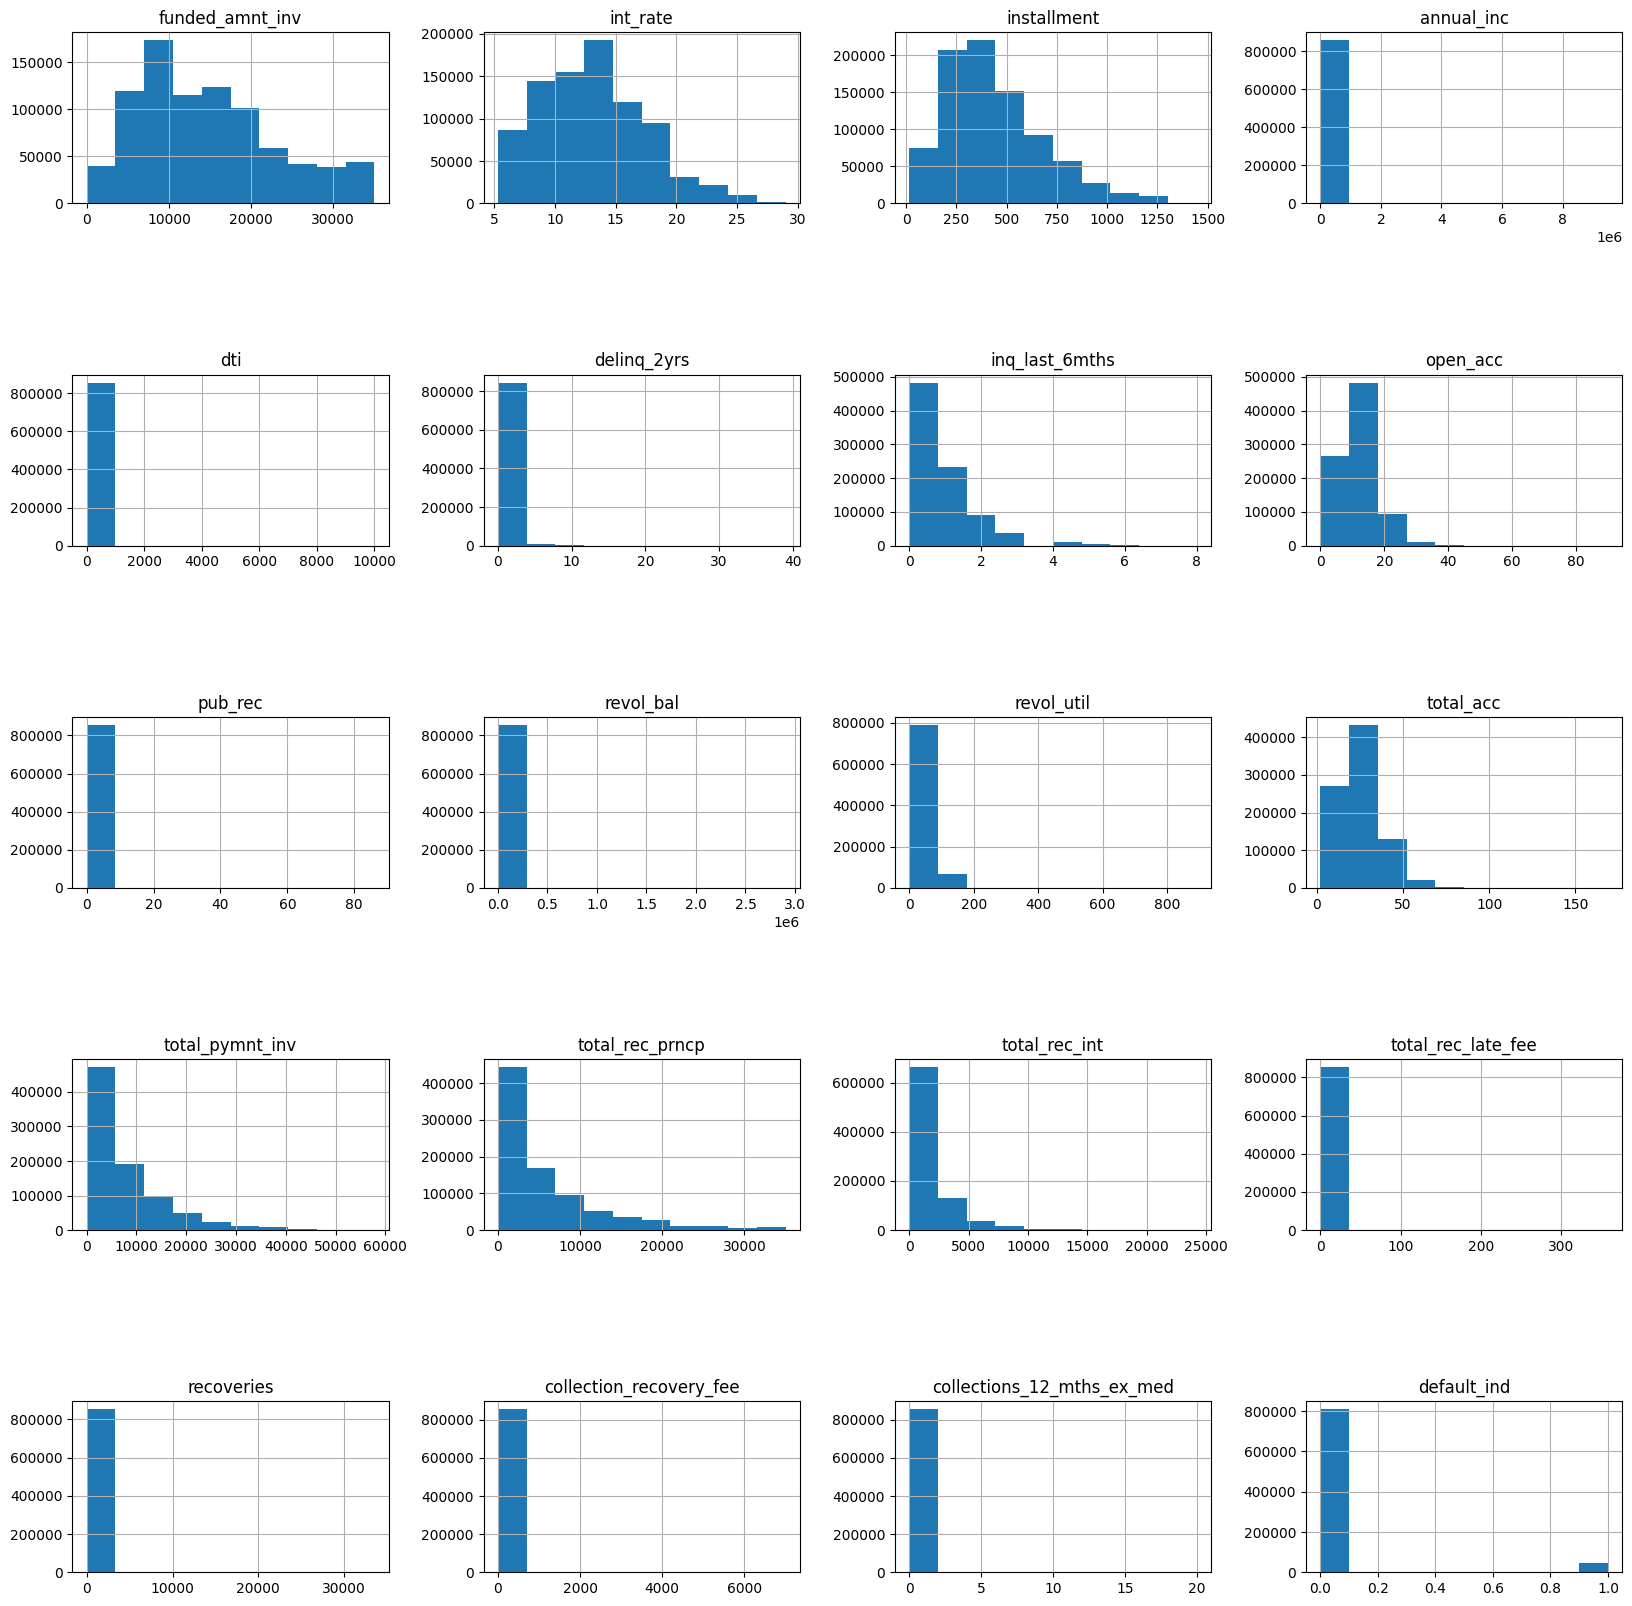

In [10]:
df.hist(figsize=(20,20))
plt.subplots_adjust(hspace=1);

# Exploratory Data Analysis

### How indenpendent features correlate to the default_ind

In [11]:
#define a function to create scatterplotf of default against numeric feature
'''
def boxplots ( columns, ncol=None, figsize=(7,7)):
    if ncol is None:
        ncol=len(columns)
    nrow=int(np.ceil(len(columns)/ncol))
    fig,axes=plt.subplots(nrow,ncol,figsize=figsize,squeeze=False)
    fig.subplots_adjust(wspace=0.5,hspace=0.6)
    for i,col in enumerate(columns):
        ax=axes.flatten()[i]
        boxplot(col,'default_ind',data=df)
        ax.set(xlabel=col, ylabel='default_ind')
    nsubplots=nrow*ncol
    for empty in range(i*1,nsubplots):
        axes.flatten()[empty].set_visible(False)
'''
def boxplots (columns,ncol=None, figsize=(5,5)):
    if ncol is None:
        ncol=len(colums)
    sns.set(rc={'figure.figsize':(8,8)})
    for  col in columns:
        sns.catplot(x='default_ind',y=col,data=df,kind='box',sym="")
        plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


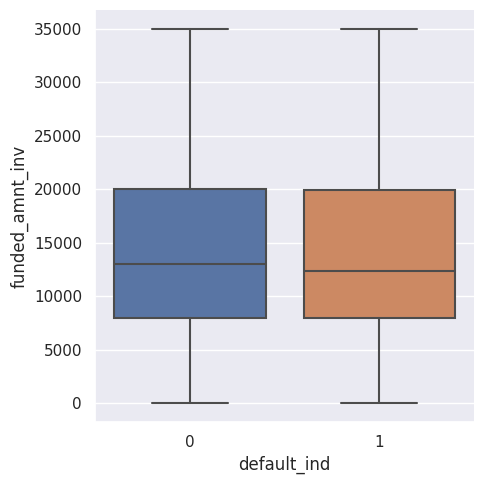

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


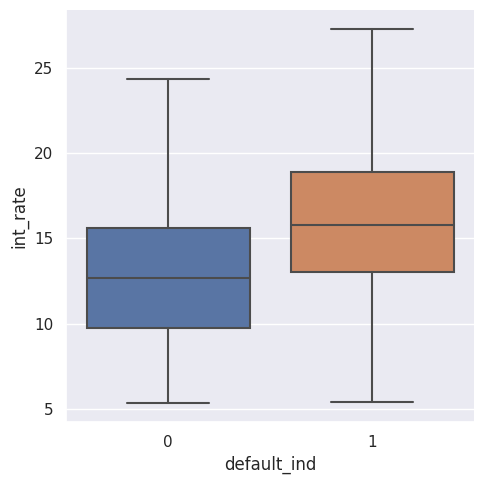

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


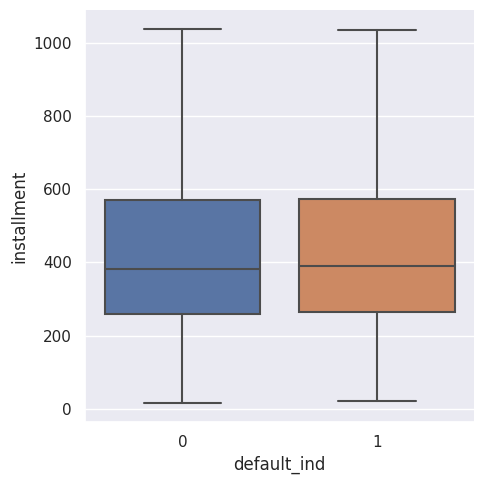

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


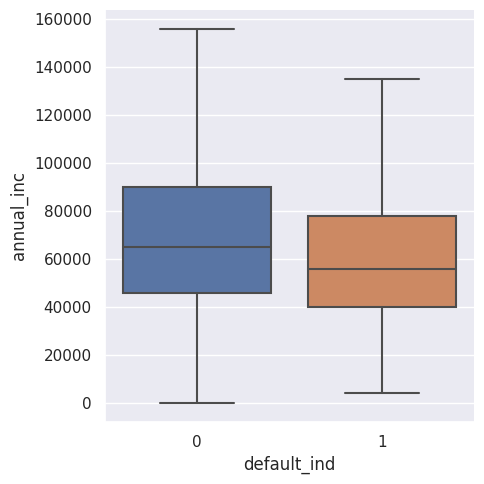

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


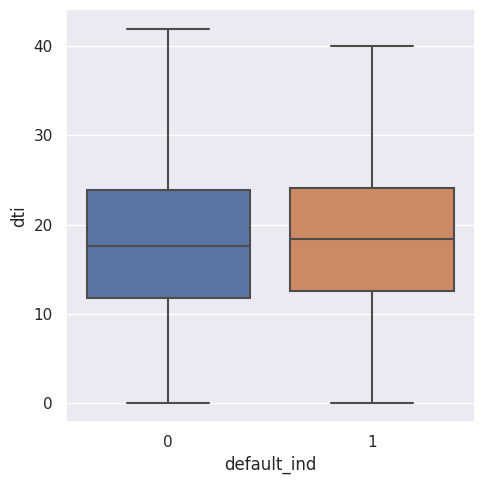

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


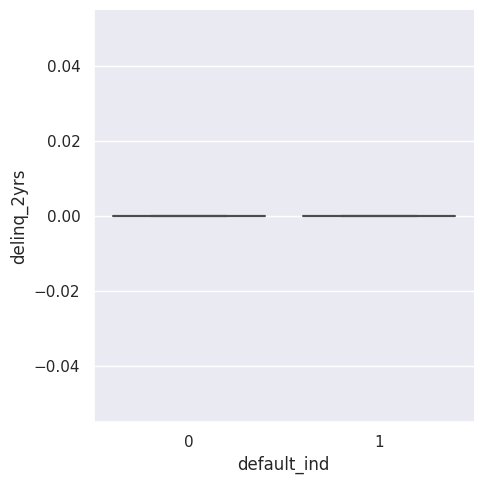

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


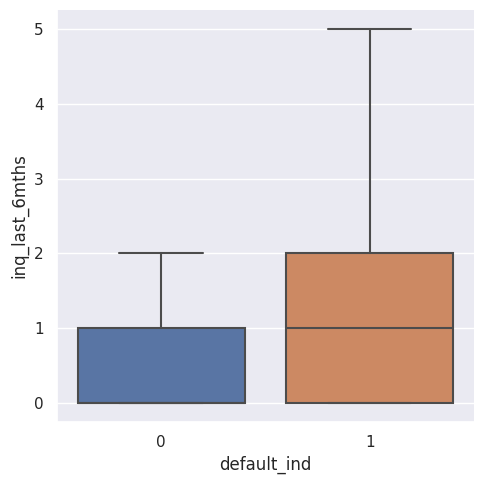

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


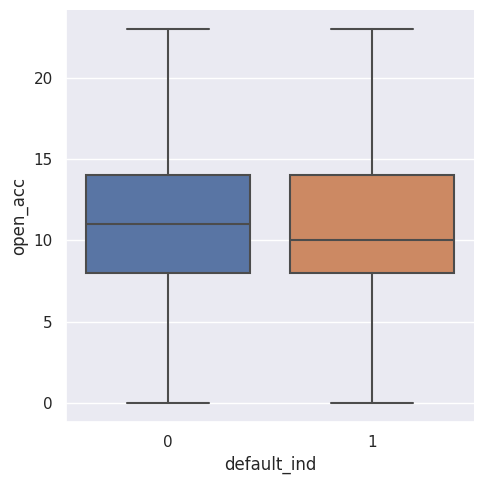

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


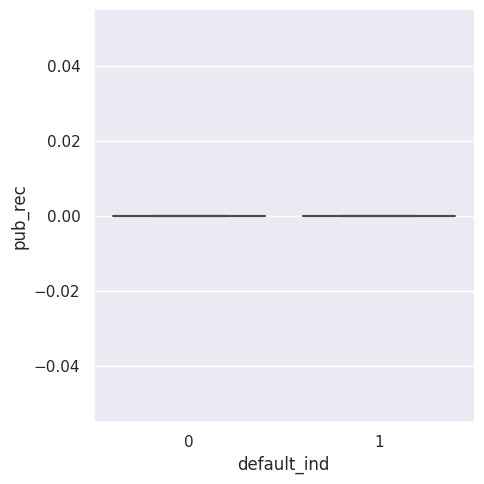

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


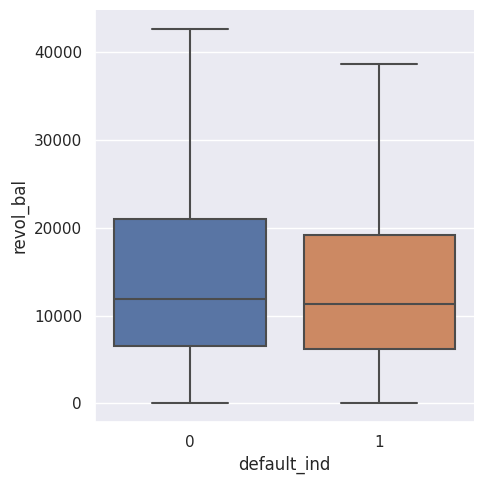

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


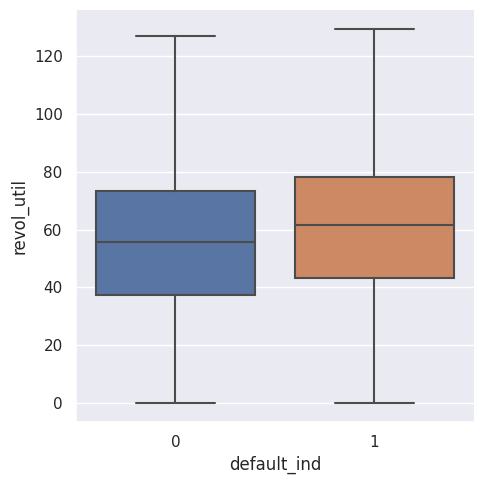

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


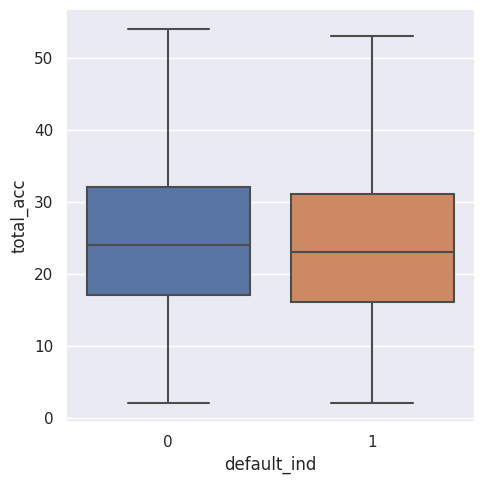

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


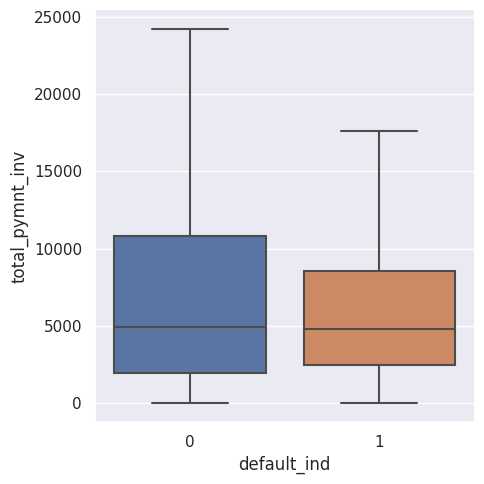

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


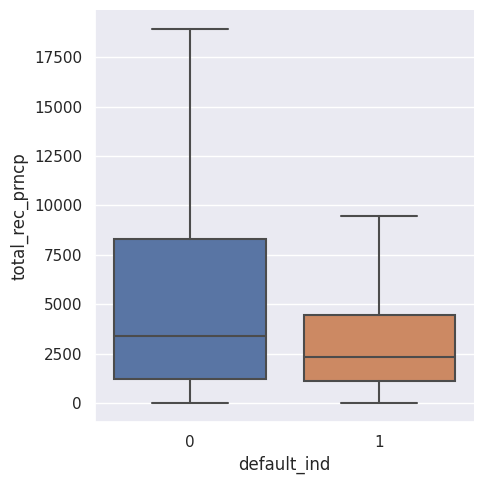

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


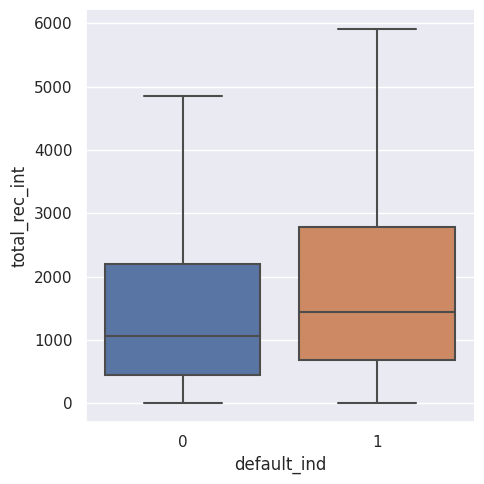

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


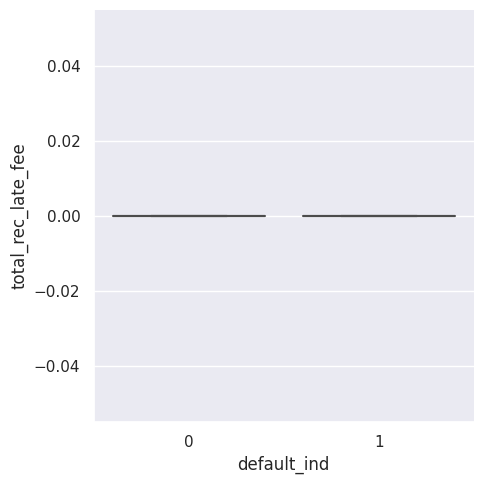

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


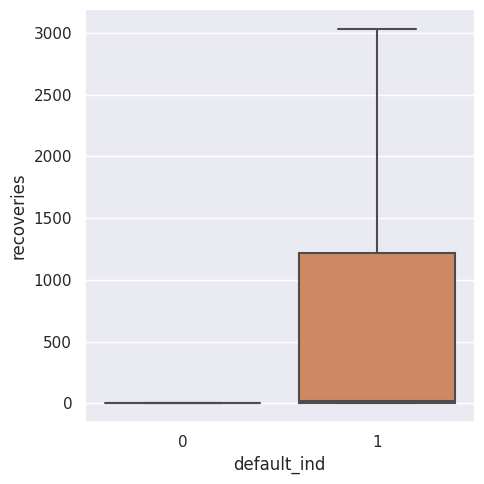

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


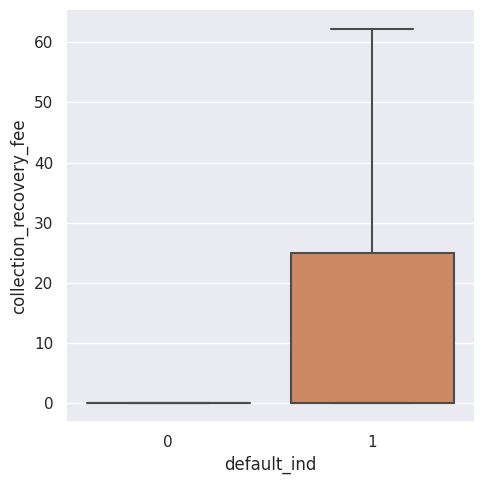

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


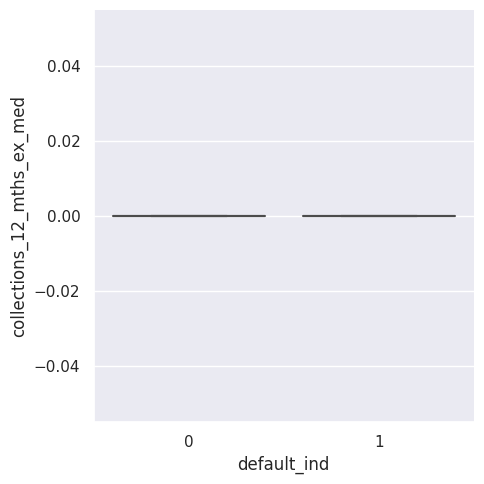

In [12]:
# select numeric features for boxplot and call boxplots
features= df.select_dtypes(include=np.number).columns.tolist()
features.remove("default_ind")
boxplots(features,ncol=3,figsize=(5,5))

## Numeric Feature Heatmap

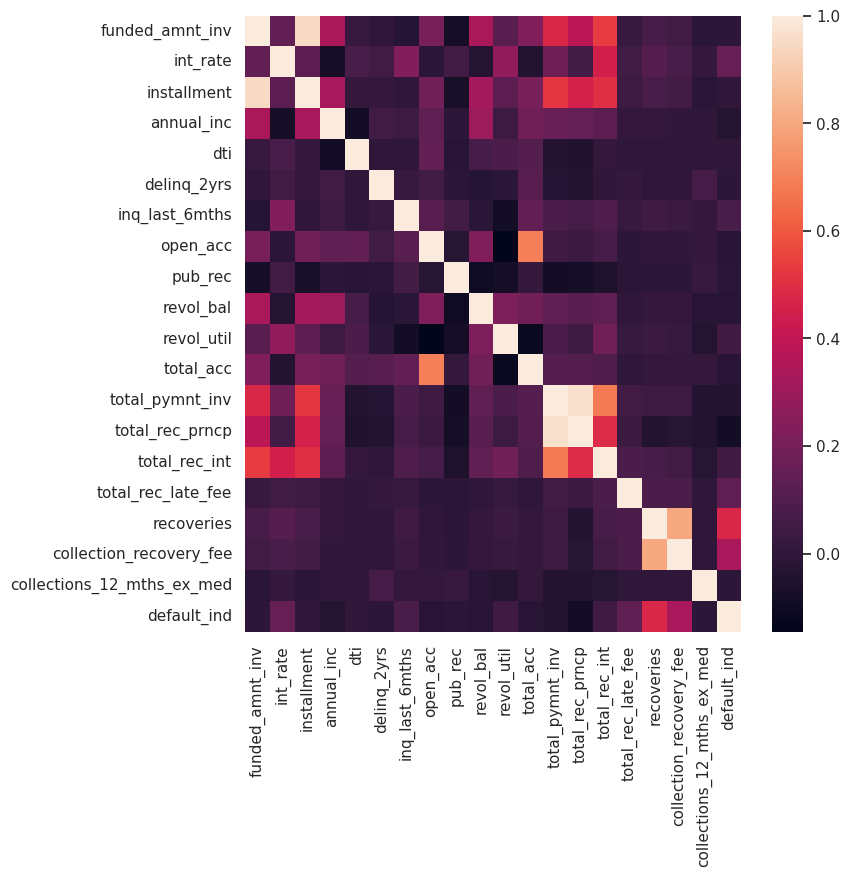

In [13]:
# show  a seaborn heatmap of correlation in numeric data
n_df=df.select_dtypes(include="number")
plt.subplots(figsize=(8,8))
sns.heatmap(n_df.corr());
plt.show()

Default loans seem to have some correlation with late fee,collection fee, and interest

### Let's look at record with defaul_ind equals to 1

In [14]:
df_default=df[df.default_ind==1]

<function matplotlib.pyplot.show(close=None, block=None)>

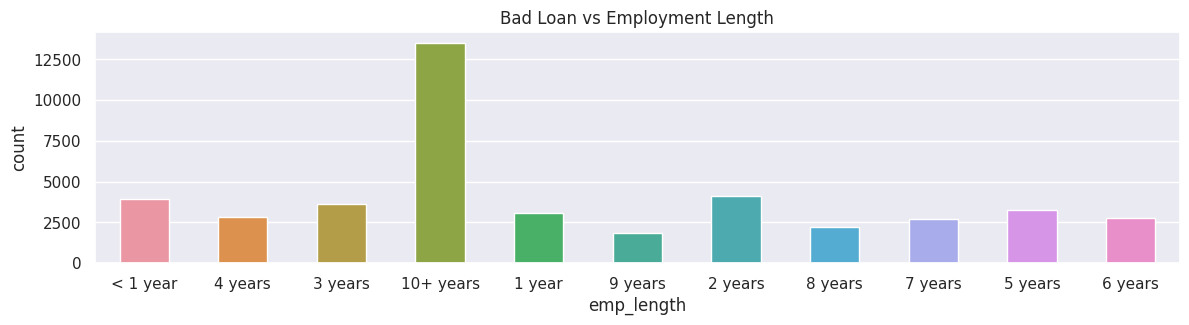

In [15]:
sns.set(rc={'figure.figsize':(14,3)})
df_default_1=df[df.default_ind==1]
sns.countplot(x='emp_length',data=df_default_1, width=0.5)
plt.title("Bad Loan vs Employment Length")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

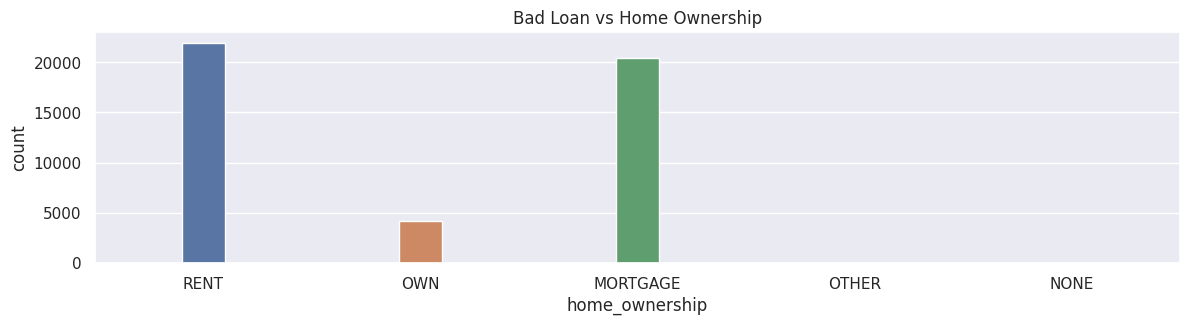

In [16]:

sns.countplot(x='home_ownership',data=df_default_1, width=0.2)
plt.title("Bad Loan vs Home Ownership")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

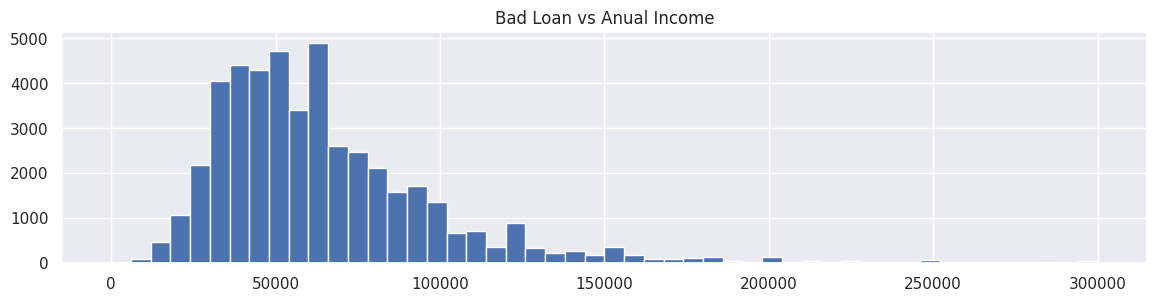

In [17]:
df_default.annual_inc.hist(bins=50, range=[0,300000])
plt.title("Bad Loan vs Anual Income")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

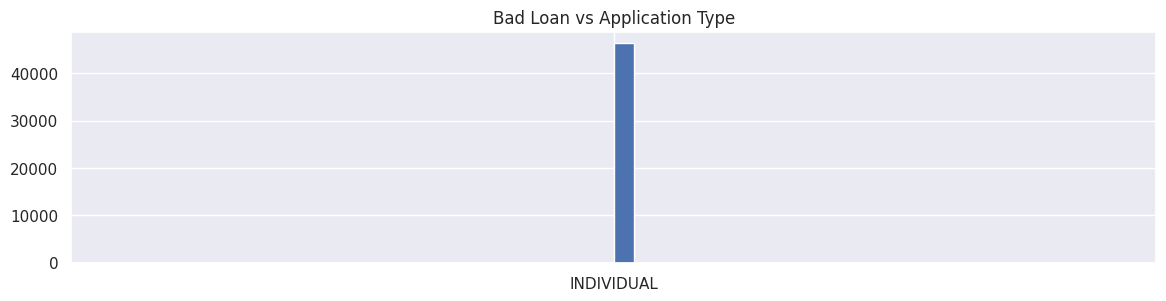

In [18]:
df_default.application_type.hist(bins=50)
plt.title("Bad Loan vs Application Type")
plt.show

### Proportion of Loan Default

Loan default counts: 
 default_ind
0    809502
1     46467
Name: count, dtype: int64

Loan default percentages: 
 0    94.571416
1     5.428584
dtype: float64


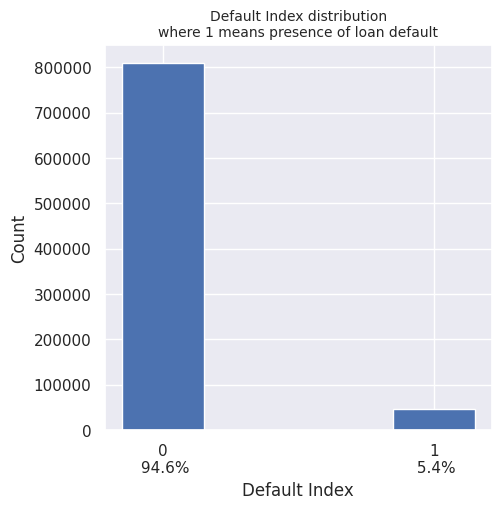

<Figure size 500x300 with 0 Axes>

In [19]:
sns.set(rc={'figure.figsize':(5,5)})
class_counts=df.default_ind.value_counts()
print("Loan default counts: \n",class_counts)

class_percentages = pd.Series([(x / df.shape[0]) * 100.00 for x in class_counts])
class_percentages
print("\nLoan default percentages: \n",class_percentages)

fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts, width=0.3)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(1).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Default Index')
ax.set_title('Default Index distribution\nwhere 1 means presence of loan default',
              fontsize = 10)
plt.figure(figsize=(5,3))
plt.show()

The percentage of loan default is about 5.4%

# Feature Engineering

### Dealing with missing data

In [20]:
df.isnull().sum().sort_values(ascending=False)

emp_length                    43061
revol_util                      446
collections_12_mths_ex_med       56
funded_amnt_inv                   0
revol_bal                         0
application_type                  0
collection_recovery_fee           0
recoveries                        0
total_rec_late_fee                0
total_rec_int                     0
total_rec_prncp                   0
total_pymnt_inv                   0
initial_list_status               0
total_acc                         0
pub_rec                           0
term                              0
open_acc                          0
inq_last_6mths                    0
delinq_2yrs                       0
dti                               0
pymnt_plan                        0
verification_status               0
annual_inc                        0
home_ownership                    0
grade                             0
installment                       0
int_rate                          0
default_ind                 

In [21]:
emp_length_nan=df.emp_length
emp_length_nan.head()


0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [22]:
df.groupby(['emp_length','default_ind'])['default_ind'].agg(['count'])
            

count
emp_length default_ind        
1 year     0             51796
           1              3059
10+ years  0            268582
           1             13508
2 years    0             71867
           1              4119
3 years    0             63754
           1              3638
4 years    0             47802
           1              2841
5 years    0             50532
           1              3280
6 years    0             38688
           1              2758
7 years    0             40531
           1              2673
8 years    0             40194
           1              2227
9 years    0             31636
           1              1826
< 1 year   0             63655
           1              3942

In [23]:
# imputing emp_length with 5 years
df['emp_length'].fillna('5 years',inplace=True)
df['revol_util'].fillna(df['revol_util'].mean(),inplace=True)
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].mean(),inplace=True)

In [24]:
df.isnull().sum().sort_values(ascending=False)

funded_amnt_inv               0
term                          0
application_type              0
collections_12_mths_ex_med    0
collection_recovery_fee       0
recoveries                    0
total_rec_late_fee            0
total_rec_int                 0
total_rec_prncp               0
total_pymnt_inv               0
initial_list_status           0
total_acc                     0
revol_util                    0
revol_bal                     0
pub_rec                       0
open_acc                      0
inq_last_6mths                0
delinq_2yrs                   0
dti                           0
pymnt_plan                    0
verification_status           0
annual_inc                    0
home_ownership                0
emp_length                    0
grade                         0
installment                   0
int_rate                      0
default_ind                   0
dtype: int64

### select independent and dependent features X and y

In [25]:

X=df.drop(['default_ind'],axis=1)
y=df['default_ind']


### Get dummies and split data into train and test sets

In [26]:
# get dummies for categorical features
X=pd.get_dummies(X)

# split data into train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape)
print(X_test.shape)



(641976, 54)
(213993, 54)


### Scaling

In [27]:
# use standard scaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)  
X_test=scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(641976, 54)
(213993, 54)


# Modeling

Loan default counts: 
 default_ind
0    607173
1     34803
Name: count, dtype: int64

Loan default percentages: 
 0    94.578769
1     5.421231
dtype: float64


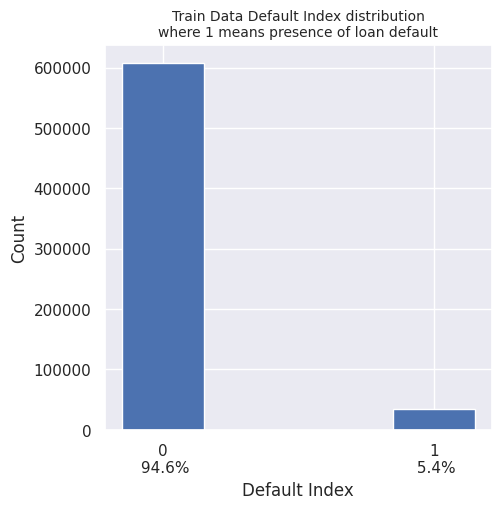

In [28]:
class_counts=y_train.value_counts()
print("Loan default counts: \n",class_counts)

class_percentages = pd.Series([(x / y_train.shape[0]) * 100.00 for x in class_counts])
class_percentages
print("\nLoan default percentages: \n",class_percentages)

fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts,width=0.3)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(1).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Default Index')
ax.set_title('Train Data Default Index distribution\nwhere 1 means presence of loan default',
              fontsize = 10)
plt.show()

Loan default counts: 
 default_ind
0    202329
1     11664
Name: count, dtype: int64

Loan default percentages: 
 0    94.549354
1     5.450646
dtype: float64


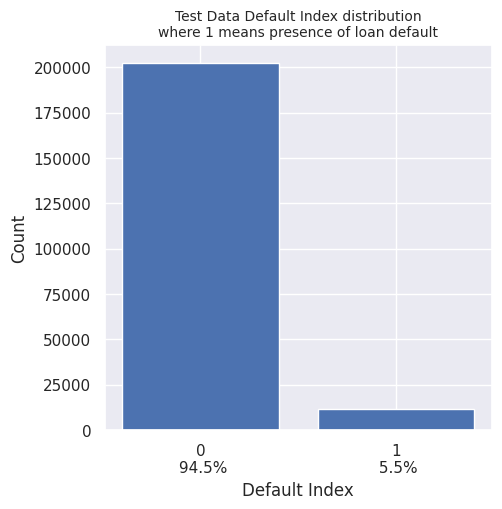

In [29]:
class_counts=y_test.value_counts()
print("Loan default counts: \n",class_counts)

class_percentages = pd.Series([(x / y_test.shape[0]) * 100.00 for x in class_counts])
class_percentages
print("\nLoan default percentages: \n",class_percentages)

fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(1).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Default Index')
ax.set_title('Test Data Default Index distribution\nwhere 1 means presence of loan default',
              fontsize = 10)
plt.show()

## Logistic Regression

In [30]:
# make variable, fit, and predict
lr = LogisticRegression(solver = 'newton-cg', max_iter = 500)
lr.fit(X_train, y_train)
y_predict_train = lr.predict(X_train)
y_predict_test = lr.predict(X_test)

# the the precision and recall scores
print("\nScores from train data set")
print(classification_report(y_train,y_predict_train))
print("\nScores from test data set")
print(classification_report(y_test,y_predict_test))


Scores from train data set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    607173
           1       0.99      0.50      0.66     34803

    accuracy                           0.97    641976
   macro avg       0.98      0.75      0.82    641976
weighted avg       0.97      0.97      0.97    641976


Scores from test data set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    202329
           1       0.99      0.50      0.66     11664

    accuracy                           0.97    213993
   macro avg       0.98      0.75      0.82    213993
weighted avg       0.97      0.97      0.97    213993



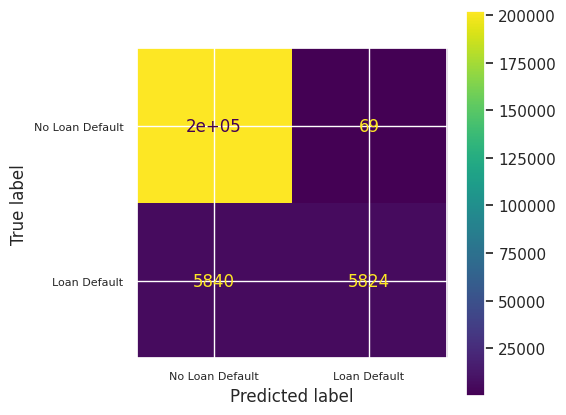

In [31]:
cm = confusion_matrix(y_test, y_predict_test, labels = lr.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['No Loan Default', 'Loan Default'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
ax.set_yticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
display_cm.plot(ax = ax)

## Decision Tree

In [32]:
# As before, make a variable, set the max_depth parameter is set to 3
gini_model =tree.DecisionTreeClassifier(criterion="gini", max_depth=5,random_state = 1234)

# Do the fit, predict, and series transformations 
gini_model.fit(X_train, y_train)
y_pred=gini_model.predict(X_test)
#pd.Series(y_pred)
# Check out entr_model
#entr_model

In [33]:
print("Gini impurity  model - max depth 10")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Gini impurity  model - max depth 10
Accuracy: 0.9739664381545191
Balanced accuracy: 0.7616730202257672
Precision score 0.998038254046101
Recall score 0.9999406906572957


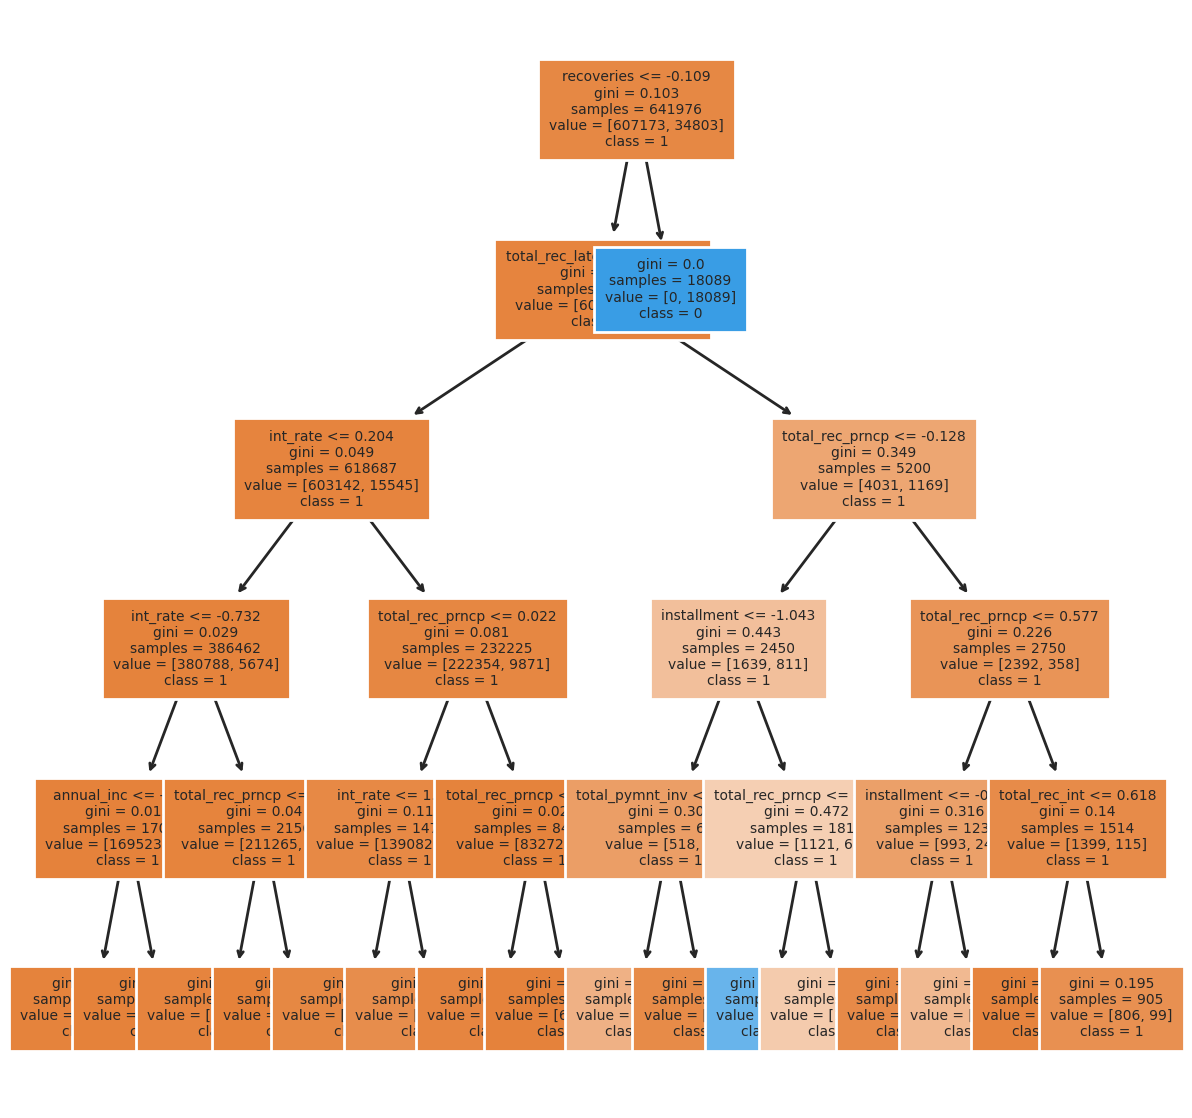

In [34]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=200)
tree.plot_tree(gini_model,feature_names=features,class_names=["1","0"],filled = True, fontsize=5)
fig.savefig('imagename_gini.png')

## Random Forest Classifier

In [35]:

rfc = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
rfc.fit(X_train, y_train)

y_predict_train_rfc = lr.predict(X_train)
y_predict_test_rfc = rfc.predict(X_test)
y_predict_test_rfc_prob = rfc.predict_proba(X_test)
#lr_probs = y_pred_prob[:,1]

ac_rfc = accuracy_score(y_test, y_predict_test_rfc)
f1_rfc = f1_score(y_test, y_predict_test_rfc, average='weighted')
cm_rfc = confusion_matrix(y_test, y_predict_test_rfc)

#print('Random Forest Classifier: Accuracy=%.3f' % (ac_rfc))
#print('Random Forest Classifier: f1-score=%.3f' % (f1_rfc))
#print('Random Forest Classifier: cm-score=%.3f' % (f1_rfc))

In [36]:
y_predict_train_rfc = lr.predict(X_train)
y_predict_test_rfc = rfc.predict(X_test)
y_predict_test_rfc_prob = rfc.predict_proba(X_test)
#lr_probs = y_pred_prob[:,1]

ac_rfc = accuracy_score(y_test, y_predict_test_rfc)
f1_rfc = f1_score(y_test, y_predict_test_rfc, average='weighted')
cm_rfc = confusion_matrix(y_test, y_predict_test_rfc)

print('Random Forest Classifier: Accuracy=%.3f' % (ac_rfc))
print('Random Forest Classifier: f1-score=%.3f' % (f1_rfc))
print('Random Forest Classifier: \n',cm_rfc)

Random Forest Classifier: Accuracy=0.975
Random Forest Classifier: f1-score=0.971
Random Forest Classifier: 
 [[202320      9]
 [  5393   6271]]


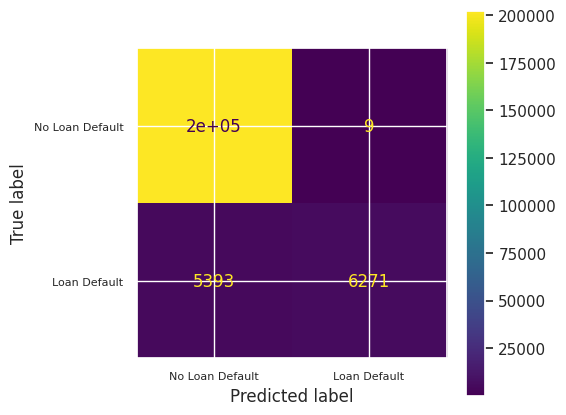

In [37]:
cm_rfc = confusion_matrix(y_test, y_predict_test_rfc,labels = rfc.classes_)

_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm_rfc, 
                                    display_labels = ['No Loan Default', 'Loan Default'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
ax.set_yticklabels(labels = ['No Loan Default', 'Loan Default'], fontsize = 8)
display_cm.plot(ax = ax)

In [38]:
print("\n Random Forest Classifier Scores from train data set")
print(classification_report(y_train,y_predict_train_rfc))
print("\n \n Random Forest Classifier Scores from test data set")
print(classification_report(y_test,y_predict_test_rfc))


 Random Forest Classifier Scores from train data set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    607173
           1       0.99      0.50      0.66     34803

    accuracy                           0.97    641976
   macro avg       0.98      0.75      0.82    641976
weighted avg       0.97      0.97      0.97    641976


 
 Random Forest Classifier Scores from test data set
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    202329
           1       1.00      0.54      0.70     11664

    accuracy                           0.97    213993
   macro avg       0.99      0.77      0.84    213993
weighted avg       0.98      0.97      0.97    213993



## Features Importances

30


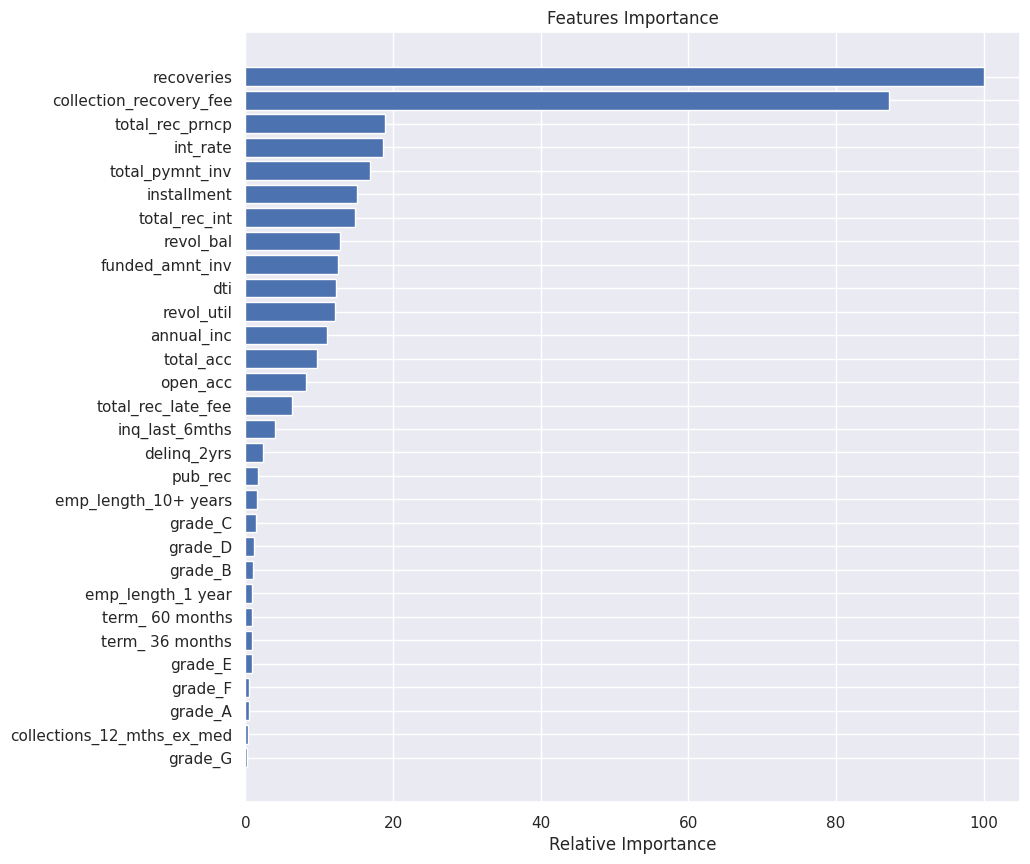

In [39]:
feature_importance = rfc.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Features Importance')
plt.show()